In [4]:
import pandas as pd
import pickle
import lxml.html
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')
#display more dataframe data
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
sns.set_palette('pastel')

/home/zy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [38]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
with open('../data/boardgamedata.pickle', 'rb') as f:
    worddata, numdata = pickle.load(f)
    
worddata.reset_index(drop=True, inplace=True)

In [6]:
#edit out html artifacts
worddata['description'] = worddata['description'].apply(lambda x: lxml.html.fromstring(x).text_content())

In [10]:
worddata.head()

,game.id,name,description,category,mechanic
0,1,Die Macher,"Die Macher is a game about seven sequential political races in different regions of Germany. Players are in charge of national political parties, and must manage limited resources to help their party to victory. The winning party will have the most victory points after all the regional elections. There are four different ways of scoring victory points. First, each regional election can supply one to eighty victory points, depending on the size of the region and how well your party does in it. Second, if a party wins a regional election and has some media influence in the region, then the party will receive some media-control victory points. Third, each party has a national party membership which will grow as the game progresses and this will supply a fair number of victory points. Lastly, parties score some victory points if their party platform matches the national opinions at the end of the game.The 1986 edition featured 4 parties from the old West Germany and supported 3-4 players. The 1997 edition supports up to 5 players in the re-united Germany and updated several features of the rules as well. The 2006 edition also supports up to 5 players and adds a shorter 5 round variant and additional rules updates by the original designer.Die Macher is #1 in the Valley Games Classic Line","[Economic, Negotiation, Political]","[Area Control, Area Influence, Auction/Bidding, Dice Rolling, Hand Management, Simultaneous Action Selection]"
1,2,Dragonmaster,"Dragonmaster is a trick-taking card game based on an older game called Coup d'etat. Each player is given a supply of plastic gems, which represent points. Each player will get to be the dealer for five different hands, with slightly different goals for each hand. After all cards have been dealt out, the dealer decides which hand best suits his or her current cards, and the other players are penalized points (in the form of crystals) for taking certain tricks or cards. For instance, if first or last is called, then a player is penalized for taking the first or last tricks. All players will get a chance to be dealer for five hands, but other players can steal this opportunity by taking all of the tricks during certain hands. At the end, the biggest pile of gems wins the game.Jewel contents:11 clear (3 extra)13 green (1 extra)22 red (2 extra)22 blue (2 extra)","[Card Game, Fantasy]",[Trick-taking]
2,3,Samurai,"Part of the Knizia tile-laying trilogy, Samurai is set in medieval Japan. Players compete to gain the favor of three factions: samurai, peasants, and priests, which are represented by helmet, rice paddy, and Buddha tokens scattered about the board, which features the islands of Japan. The competition is waged through the use of hexagonal tiles, each of which help curry favor of one of the three factions — or all three at once! Players can make lightning-quick strikes with horseback ronin and ships or approach their conquests more methodically. As each token (helmets, rice paddies, and Buddhas) is surrounded, it is awarded to the player who has gained the most favor with the corresponding group.Gameplay continues until all the symbols of one type have been removed from the board or four tokens have been removed from play due to a tie for influence.At the end of the game, players compare captured symbols of each type, competing for majorities in each of the three types. Ties are not uncommon and are broken based on the number of other, non-majority symbols each player has collected.","[Abstract Strategy, Medieval]","[Area Control, Area Influence, Hand Management, Set Collection, Tile Placement]"
3,4,Tal der Könige,"When you see the triangular box and the luxurious, large blocks, you can tell this game was designed to be beautiful as well as functional. The object of the game is to build pyramids out of the different colored blocks. A pyramid scores more points when it's made from a few colors, but it's much harder to consis

### plot by category

In [7]:
def create_cat_df(df,column,nametext):
    list_ = []
    for i in df[column]:
        for cat_ in i:
            list_.append(cat_)
    set_ = set(list_)
    print(f"Number of unique {nametext} : {len(list(set_))}")
    
    cat_dict = {}
    for cat_ in set_:
        cat_dict[cat_] = df[column].apply(lambda x: cat_ in x).sum()
        
    cat_df = pd.DataFrame.from_dict(cat_dict, orient='index', columns=['#']).reset_index()
    cat_df.columns=[nametext,'Num']
    cat_df=cat_df.sort_values(['Num'],ascending=False).reset_index(drop=True)
    
    return cat_df

In [17]:
cat_df = create_cat_df(worddata,'category','Categories')

Number of unique Categories : 91


### plot bar graph of top categories

In [35]:
def plot_cat_bar(df,nametext,num):
    sns.color_palette("viridis")
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":18,
                             "axes.labelsize":18,'legend.fontsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15}) 
    plt.figure(figsize=(10,10))
    sns.barplot(x='Num',y=nametext,data=df.iloc[0:num])
    plt.title(f'Top {num} Boardgame {nametext}')

    plt.savefig(f'../img/top{nametext}.png',dpi=300, transparent=True)

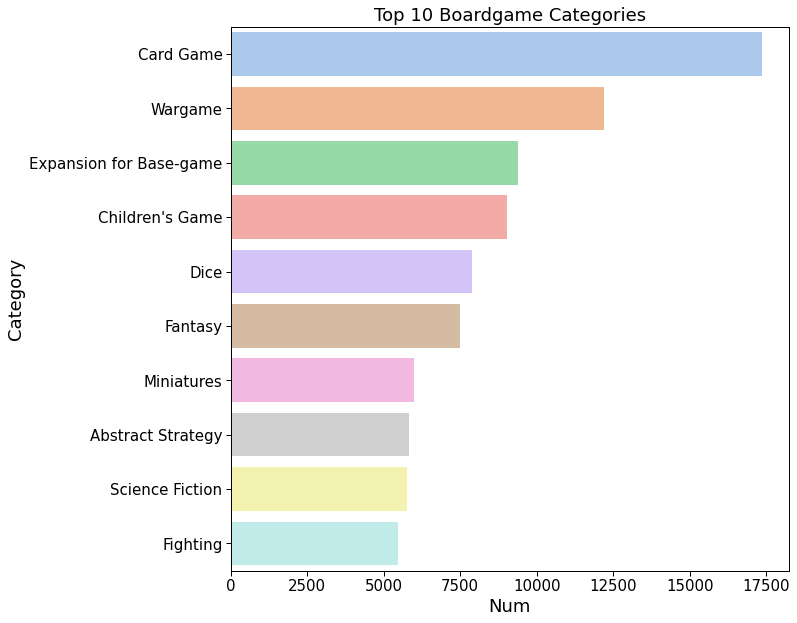

In [92]:
sns.color_palette("viridis")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":18,
                             "axes.labelsize":18,'legend.fontsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15}) 
plt.figure(figsize=(10,10))
sns.barplot(x='Num',y='Category',data=cat_df.iloc[0:10])
plt.title('Top 10 Boardgame Categories')

plt.savefig('../img/topcategory.png',dpi=300)

### plot pie chart of categories

In [31]:
def plot_cat_pie(df,columnname,nametext,num):
    #plots a pie chart of top *num* of categories, grouping the rest as "Others"
    
    #separating top *num* of rows from the rest
    df_pie = df.iloc[0:num]
    #finding the total entries in "Others"
    others_sum = df['Num'].iloc[num:].sum()
    #finding the number of categories in "Others"
    others_num = df['Num'].iloc[num:].shape[0]
    #printing the number of categories in "Others"
    print(f"Number of Categories in Others: {others_num}")
    #append new "Others" row to original df
    df_pie = df_pie.append({columnname:f'Others({others_num})','Num':others_sum},ignore_index=True)
    print(df_pie)
    #creating the pie chart
    pie, ax = plt.subplots(figsize=[20,20])
    labels = df_pie[columnname]
    plt.pie(x=df_pie['Num'], 
            autopct="%.1f%%", 
            explode=[0.05]*(num+1), 
            labels=labels,
           pctdistance=0.90,
           textprops={'fontsize':30})
    plt.title(f"Top {num} Boardgame {nametext}", fontsize=70)

    plt.savefig(f'../img/top{num}.{nametext}_pie.png',dpi=150,transparent=True)

Number of Categories in Others: 76
                 Categories     Num
0   Card Game                17372 
1   Wargame                  12216 
2   Expansion for Base-game  9379  
3   Children's Game          9044  
4   Dice                     7876  
5   Fantasy                  7491  
6   Miniatures               6006  
7   Abstract Strategy        5828  
8   Science Fiction          5772  
9   Fighting                 5466  
10  Economic                 5357  
11  Educational              5276  
12  Party Game               5180  
13  TV                       4568  
14  Movies                   4568  
15  Others(76)               100413


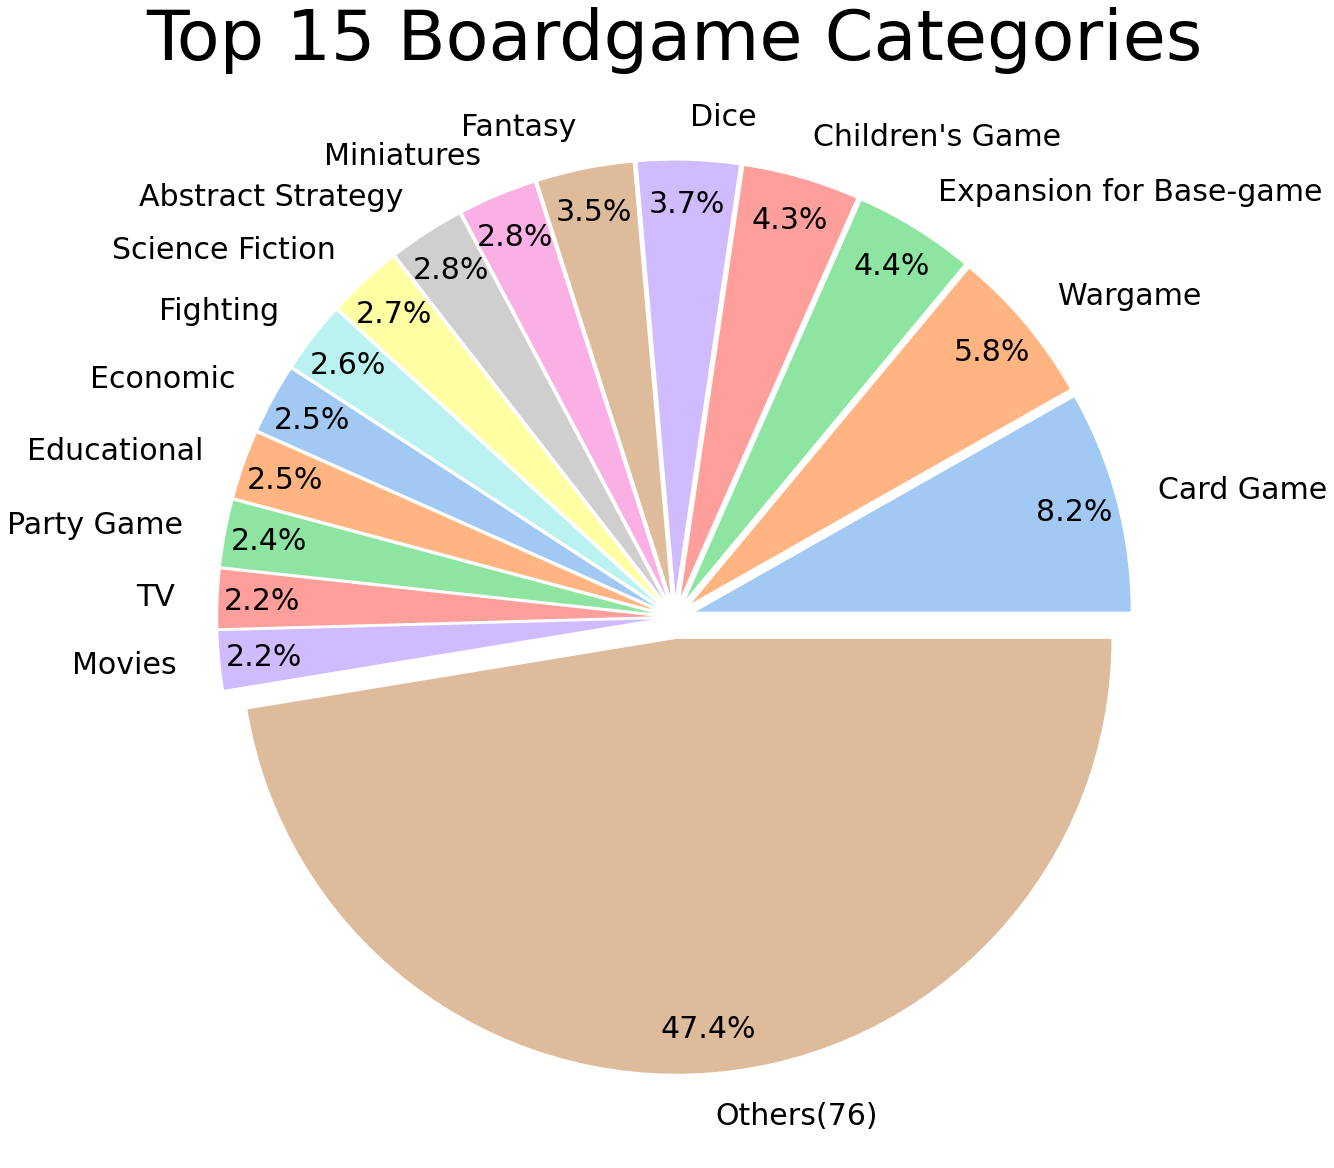

In [32]:
plot_cat_pie(cat_df,'Categories','Categories',15)

Number of Categories in Others: 41
                        Mechanics    Num
0   Dice Rolling                   20339
1   Roll                           13478
2   Spin and Move                  13478
3   Hand Management                10990
4   Set Collection                 9058 
5   Variable Player Powers         7289 
6   Hex-and-Counter                6710 
7   Card Drafting                  6078 
8   Tile Placement                 4732 
9   Modular Board                  4598 
10  Co-operative Play              4353 
11  Simulation                     3920 
12  Memory                         3855 
13  Point to Point Movement        3836 
14  Simultaneous Action Selection  3566 
15  Others(41)                     65525


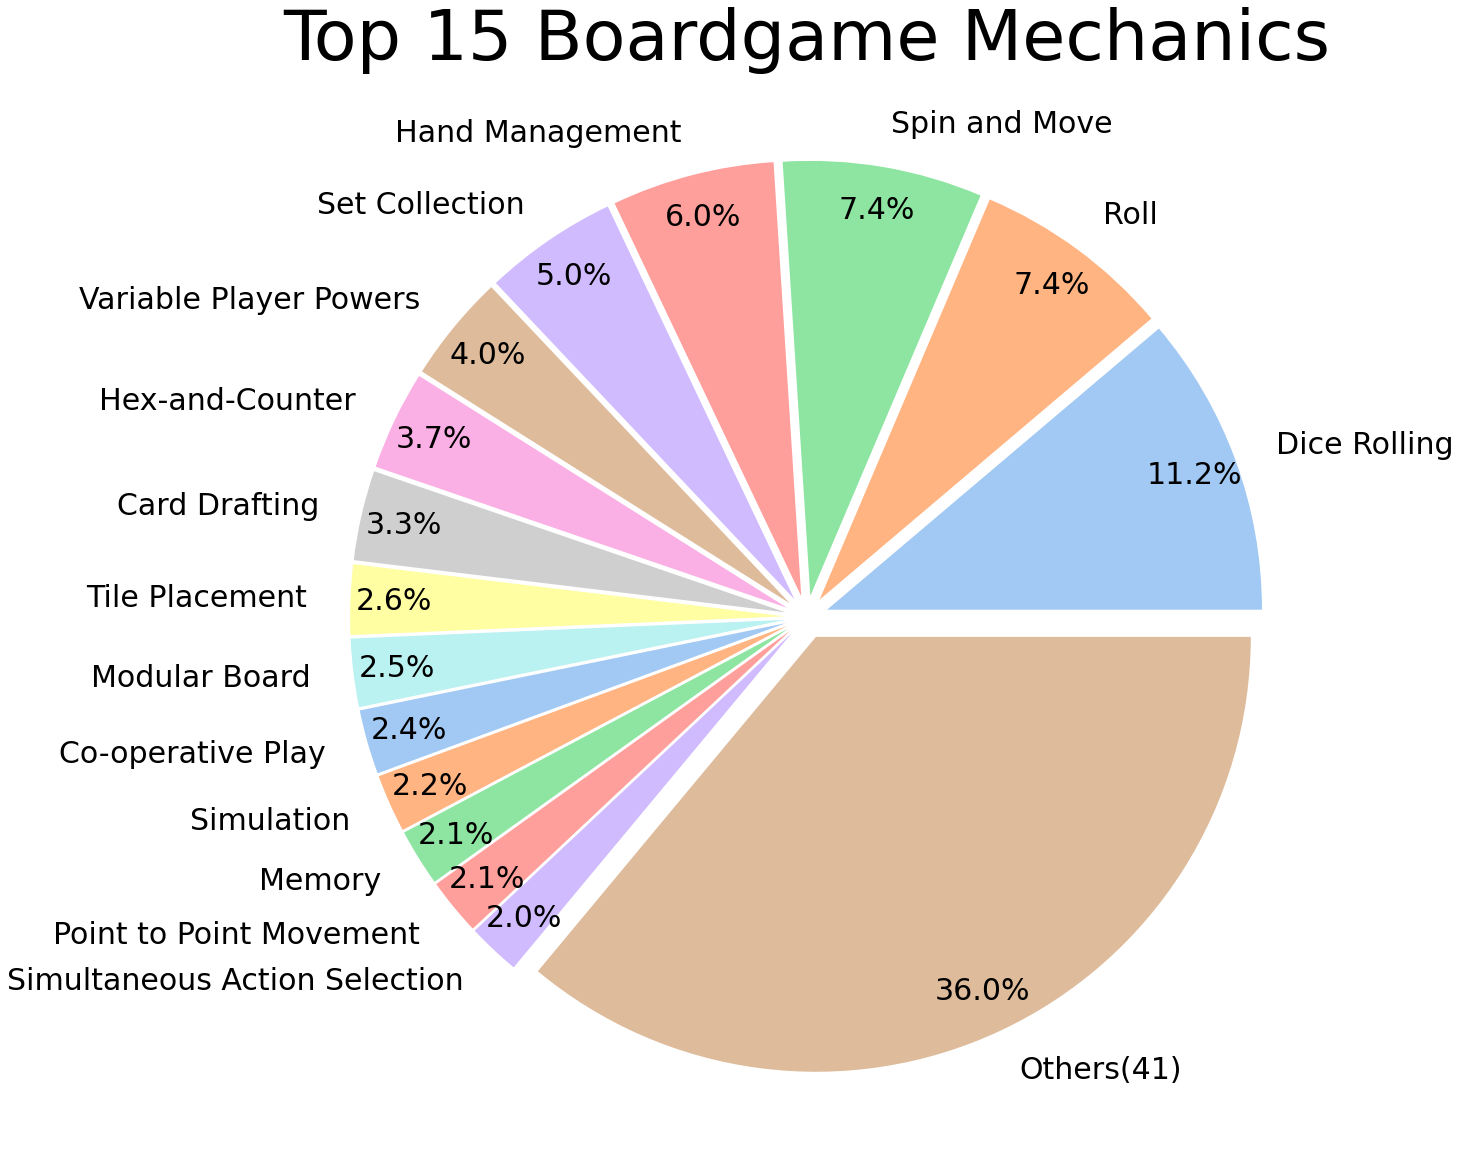

In [33]:
plot_cat_pie(mech_df,'Mechanics','Mechanics',15)

### plotting for game mechanics

In [95]:
worddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74264 entries, 0 to 74263
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game.id      74264 non-null  int64 
 1   name         74264 non-null  object
 2   description  74264 non-null  object
 3   category     74264 non-null  object
 4   mechanic     74264 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [24]:
mech_df = create_cat_df(worddata,'mechanic','Mechanics')

Number of unique Mechanics : 56


In [113]:
mech_df

,Mechanics,Num
0,Dice Rolling,20339
1,Spin and Move,13478
2,Roll,13478
3,Hand Management,10990
4,Set Collection,9058
5,Variable Player Powers,7289
6,Hex-and-Counter,6710
7,Card Drafting,6078
8,Tile Placement,4732
9,Modular Board,4598


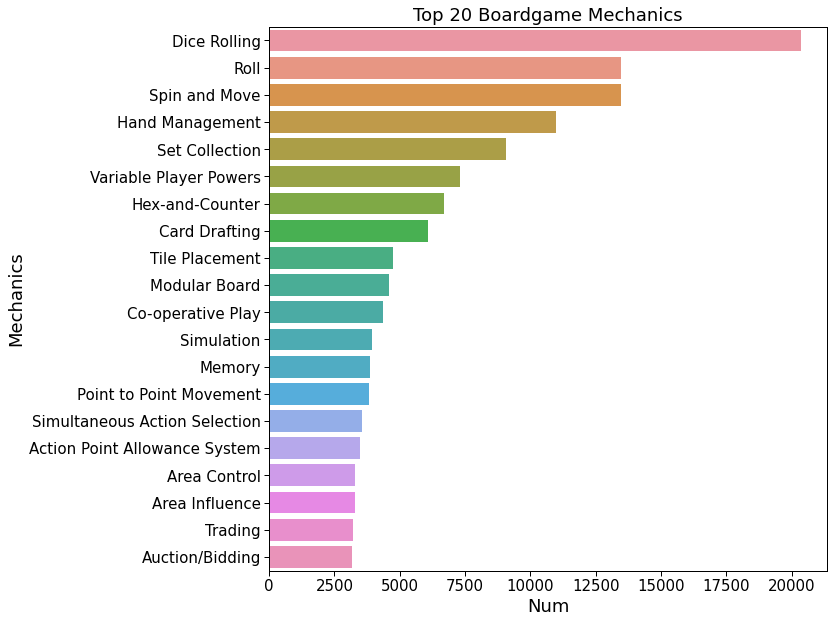

In [36]:
plot_cat_bar(mech_df,'Mechanics',20)

Number of Categories in Others: 41
                        Mechanics    Num
0   Dice Rolling                   20339
1   Roll                           13478
2   Spin and Move                  13478
3   Hand Management                10990
4   Set Collection                 9058 
5   Variable Player Powers         7289 
6   Hex-and-Counter                6710 
7   Card Drafting                  6078 
8   Tile Placement                 4732 
9   Modular Board                  4598 
10  Co-operative Play              4353 
11  Simulation                     3920 
12  Memory                         3855 
13  Point to Point Movement        3836 
14  Simultaneous Action Selection  3566 
15  Others(41)                     65525


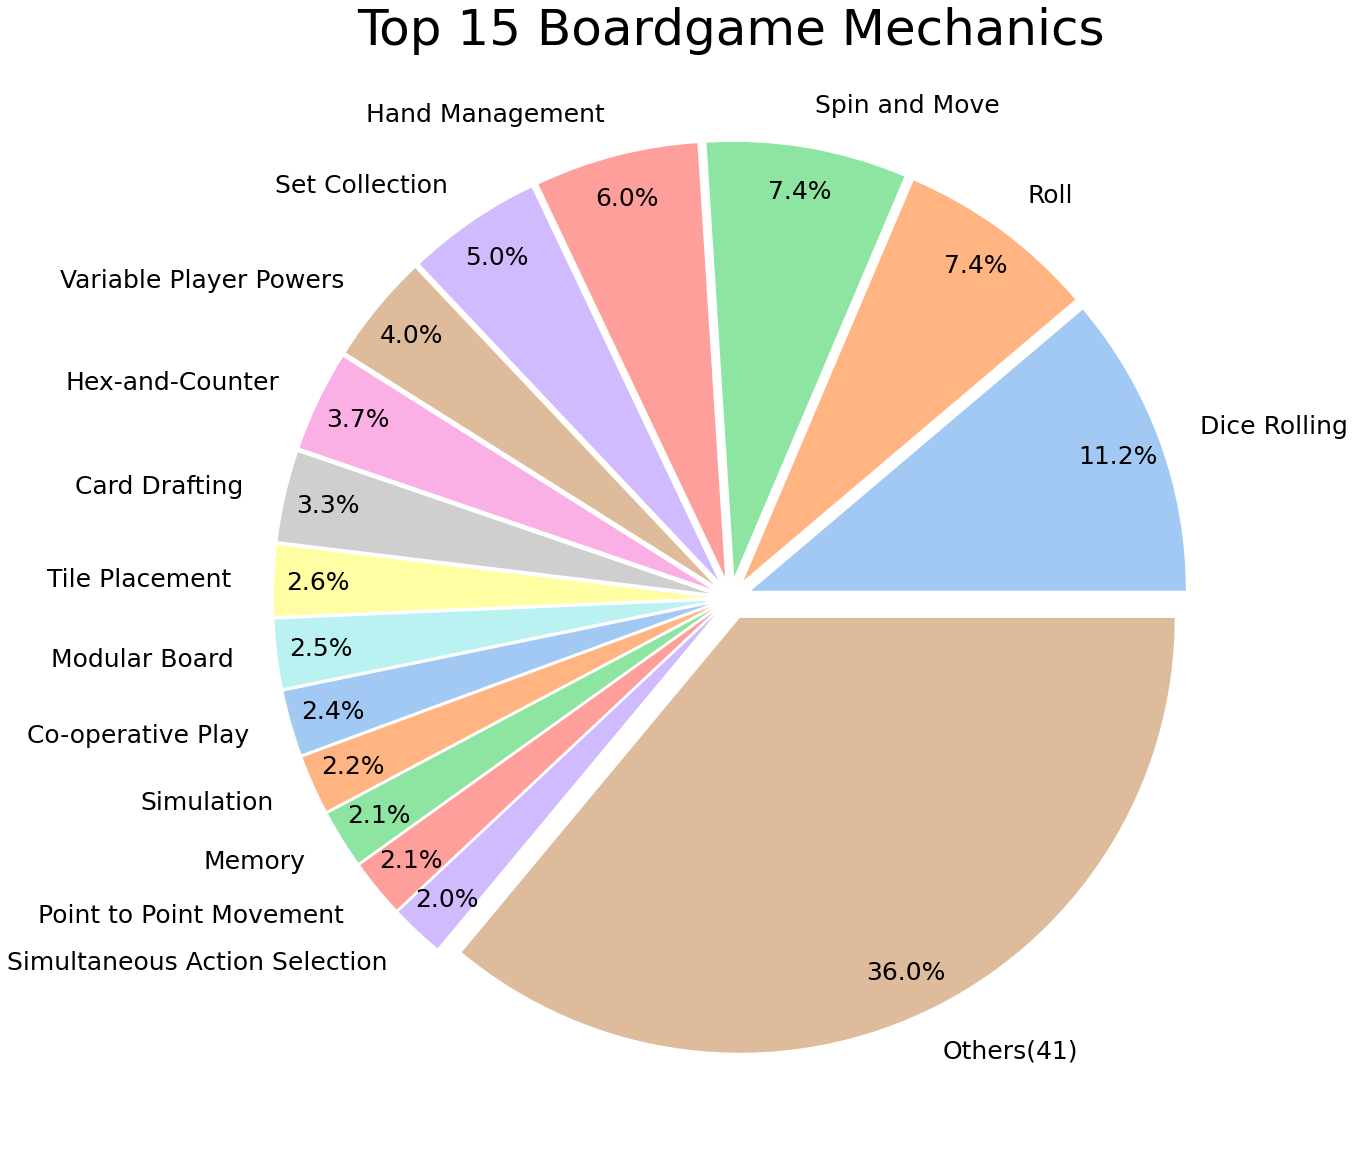

In [30]:
plot_cat_pie(mech_df,'Mechanics','Mechanics',15)

In [ ]:
aaa